<a href="https://colab.research.google.com/github/Nabielah27/music-py/blob/main/FaceRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [4]:
!pip install streamlit-webrtc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.2/773.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 35.0 MB/s eta 0:00:00


In [5]:
!pip install av

In [16]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import av
import streamlit as st
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import webbrowser

In [26]:
print(tf.__version__)

2.16.1


In [27]:
tf.keras.backend.clear_session()

In [1]:
pip install --upgrade tensorflow keras

In [11]:
!pip install tensorflow

In [12]:
!pip install keras

In [4]:
img_shape = 48
batch_size = 64

train_data_path = '/content/drive/MyDrive/FaceRec/dataset'
test_data_path = '/content/drive/MyDrive/FaceRec/validation'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_preprocessor = ImageDataGenerator(
   rescale = 1 / 255.,
   # Data Augmentation
   rotation_range=10,
   zoom_range=0.2,
   width_shift_range=0.1,
   height_shift_range=0.1,
   horizontal_flip=True,
   fill_mode='nearest',
)
test_preprocessor = ImageDataGenerator(
   rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
   train_data_path,
   class_mode="categorical",
   target_size=(img_shape,img_shape),
   color_mode='rgb',
   shuffle=True,
   batch_size=batch_size,
   subset='training',
)

test_data = test_preprocessor.flow_from_directory(
   test_data_path,
   class_mode="categorical",
   target_size=(img_shape,img_shape),
   color_mode="rgb",
   shuffle=False,
   batch_size=batch_size,
)

Found 18621 images belonging to 5 classes.
Found 5053 images belonging to 5 classes.


In [8]:
def Create_CNN_Model():

    model = Sequential()

    # CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(5, activation='softmax'))

    return model

In [28]:
CNN_Model = Create_CNN_Model()
CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
Y_train = ['angry', 'disgust', 'fear', 'happy', 'sad']

label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)
print(Y_train_encoded)

[0 1 2 3 4]


In [13]:
label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)

In [14]:
print(Y_train[:5])

['angry', 'disgust', 'fear', 'happy', 'sad']


In [17]:
Y_train = np.array(Y_train)
print(Y_train.dtype)

<U7


In [18]:
Y_train = np.array(Y_train)

In [19]:
from keras.utils import to_categorical

In [20]:
num_classes = len(np.unique(Y_train))

In [21]:
Y_train_one_hot = to_categorical(Y_train_encoded, num_classes=10)

In [22]:
print(train_data.labels.shape)
print(test_data.labels.shape)

(18621,)
(5053,)


In [23]:
num_classes = len(set(train_data.labels))

In [29]:
CNN_Model.layers[-1] = tf.keras.layers.Dense(num_classes, activation='softmax')

In [30]:
CNN_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
CNN_Score = CNN_Model.evaluate(test_data)

print(" Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

def plot_curves(history):

   loss = history.history["loss"]
   val_loss = history.history["val_loss"]

   accuracy = history.history["accuracy"]
   val_accuracy = history.history["val_accuracy"]

   epochs = range(len(history.history["loss"]))

   plt.figure(figsize=(15,5))

   #plot loss
   plt.subplot(1, 2, 1)
   plt.plot(epochs, loss, label = "training_loss")
   plt.plot(epochs, val_loss, label = "val_loss")
   plt.title("Loss")
   plt.xlabel("epochs")
   plt.legend()

   #plot accuracy
   plt.subplot(1, 2, 2)
   plt.plot(epochs, accuracy, label = "training_accuracy")
   plt.plot(epochs, val_accuracy, label = "val_accuracy")
   plt.title("Accuracy")
   plt.xlabel("epochs")
   plt.legend()
   plot_curves(CNN_history)

KeyboardInterrupt: 

In [32]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/79 ━━━━━━━━━━━━━━━━━━━━ 17:36 14s/step

KeyboardInterrupt: 

In [33]:
from tensorflow.keras.utils import img_to_array, load_img

In [34]:
Emotion_Classes = ["angry", "disgust", "fear", "happy", "sad"]

Found 5053 images belonging to 5 classes.


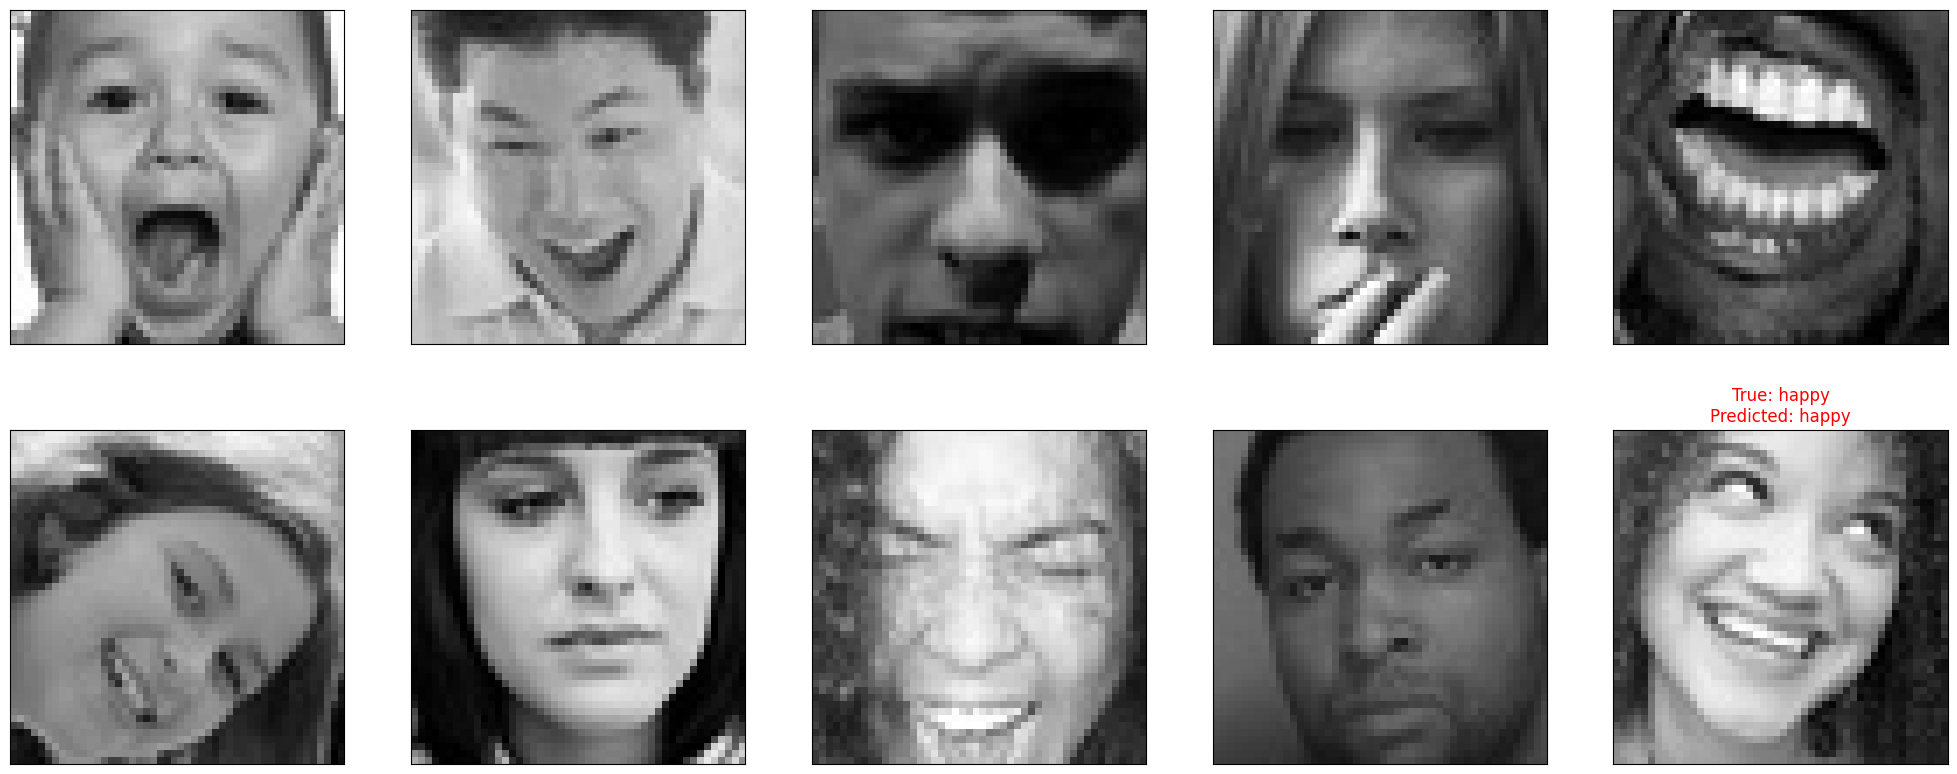

<Figure size 640x480 with 0 Axes>

In [35]:
test_preprocessor = ImageDataGenerator(
   rescale = 1 / 255.,
)

test_generator = test_preprocessor.flow_from_directory(
   test_data_path,
   class_mode="categorical",
   target_size=(img_shape,img_shape),
   color_mode="rgb",
   shuffle=True,
   batch_size=batch_size,
)

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(
   nrows=2, ncols=5, figsize=(25, 10),
   subplot_kw={'xticks': [], 'yticks': []}
)

for i, ax in enumerate(axes.flat):
   Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
   Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

   Model_Prediction = np.argmax(CNN_Model.predict( tf.expand_dims(Random_Img,
   axis=0) , verbose=0))
   ax.imshow(Random_Img)
   if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
      color = "green"
else:
    color = "red"
ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [36]:
!pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [37]:
!pip install pandas

In [38]:
import pandas as pd

In [39]:
Music_Player = pd.read_csv("/content/drive/MyDrive/FaceRec/data_moods.csv")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [40]:
Play = Music_Player[Music_Player['mood'] == 'Happy' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Pumped Up Kicks,Foster The People,Happy,84
1,Africa,TOTO,Happy,84
2,Take on Me,a-ha,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83


In [41]:
st.header("Emotion Based Music Recommender")

2024-05-23 10:06:41.044 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [42]:
if "run" not in st.session_state:
	st.session_state["run"] = "true"

try:
	emotion = np.load("emotion.npy")[0]
except:
	emotion=""

if not(emotion):
	st.session_state["run"] = "true"
else:
	st.session_state["run"] = "false"

2024-05-23 10:06:44.624 Session state does not function when running a script without `streamlit run`


In [43]:
class EmotionProcessor:
	def recv(self, frame):
		frm = frame.to_ndarray(format="bgr24")

		##############################
		frm = cv2.flip(frm, 1)

		res = holis.process(cv2.cvtColor(frm, cv2.COLOR_BGR2RGB))

		lst = []

		if res.face_landmarks:
			for i in res.face_landmarks.landmark:
				lst.append(i.x - res.face_landmarks.landmark[1].x)
				lst.append(i.y - res.face_landmarks.landmark[1].y)

			if res.left_hand_landmarks:
				for i in res.left_hand_landmarks.landmark:
					lst.append(i.x - res.left_hand_landmarks.landmark[8].x)
					lst.append(i.y - res.left_hand_landmarks.landmark[8].y)
			else:
				for i in range(42):
					lst.append(0.0)

			if res.right_hand_landmarks:
				for i in res.right_hand_landmarks.landmark:
					lst.append(i.x - res.right_hand_landmarks.landmark[8].x)
					lst.append(i.y - res.right_hand_landmarks.landmark[8].y)
			else:
				for i in range(42):
					lst.append(0.0)

			lst = np.array(lst).reshape(1,-1)

			pred = label[np.argmax(model.predict(lst))]

			print(pred)
			cv2.putText(frm, pred, (50,50),cv2.FONT_ITALIC, 1, (255,0,0),2)

			np.save("emotion.npy", np.array([pred]))


		drawing.draw_landmarks(frm, res.face_landmarks, holistic.FACEMESH_TESSELATION,
								landmark_drawing_spec=drawing.DrawingSpec(color=(0,0,255), thickness=-1, circle_radius=1),
								connection_drawing_spec=drawing.DrawingSpec(thickness=1))
		drawing.draw_landmarks(frm, res.left_hand_landmarks, hands.HAND_CONNECTIONS)
		drawing.draw_landmarks(frm, res.right_hand_landmarks, hands.HAND_CONNECTIONS)


		##############################

		return av.VideoFrame.from_ndarray(frm, format="bgr24")

In [44]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):

   if( pred_class=='Disgust' ):
      Play = Music_Player[Music_Player['mood'] =='Sad' ]
      Play = Play.sort_values(by="popularity", ascending=False)
      Play = Play[:5].reset_index(drop=True)
      display(Play)

   if( pred_class=='Happy' or pred_class=='Sad' ):
      Play = Music_Player[Music_Player['mood'] =='Happy' ]
      Play = Play.sort_values(by="popularity", ascending=False)
      Play = Play[:5].reset_index(drop=True)
      display(Play)

   if( pred_class=='Fear' or pred_class=='Angry' ):
      Play = Music_Player[Music_Player['mood'] =='Calm' ]
      Play = Play.sort_values(by="popularity", ascending=False)
      Play = Play[:5].reset_index(drop=True)
      display(Play)


In [45]:
print("Select a mood by entering a number:\n1. Disgust\n2. Happy\n3. Fear/Angry\n4. Sad")
selected_mood = int(input("Enter a number for the mood you want to select: "))

# Display recommended songs based on selected mood
if selected_mood == 1:
   Recommend_Songs('Disgust')
elif selected_mood == 2:
   Recommend_Songs('Happy')
elif selected_mood == 3:
   Recommend_Songs('Fear')
elif selected_mood == 4:
   Recommend_Songs('Sad')
else:
   print("Invalid input. Please enter a number between 1 and 4.")

Select a mood by entering a number:
1. Disgust
2. Happy
3. Fear/Angry
4. Sad
Enter a number for the mood you want to select: 2


,name,artist,mood,popularity
0,Pumped Up Kicks,Foster The People,Happy,84
1,Africa,TOTO,Happy,84
2,Take on Me,a-ha,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83
